# Notebook to analyse the obtained results

In [100]:
import pandas as pd
import os

def load() -> pd.DataFrame:
    path = os.getcwd() + "\\"

    ds_names_list: list[str] = ["results_25000_0.7_network.csv"]

    df_list: list[pd.DataFrame] = []

    for ds_name in ds_names_list:
        df: pd.DataFrame = pd.read_csv(path + ds_name)

        df_list.append(df)

    data: pd.DataFrame = pd.concat(df_list, axis=0, ignore_index=True)
    data = data.groupby(['algorithm', 'parallel', 'delta', 'graph_size', 'graph_density', 'n_threads'], as_index=False).mean().drop(columns=['n_repeat'])

    return data

data = load()

In [101]:
class Algorithm:
    fwd = {
        0:"FloydSequential",
        1: "FloydParallel", 
        2: "DijkstraParallel",
        3: "ParallelDeltaSteppingAllTerminal"
        }
    bwd = {v: k for k, v in fwd.items()}
    def __getitem__(self, item):
        if type(item) == str:
            return self.bwd[item]
        elif type(item) == int:
            return self.fwd[item]

    def __iter__(self):
        return self.fwd.__iter__()

def filter_df(df, alg:str | int = None, parallel:bool = None, delta:int = None, graph_size:int = None, graph_density:float = None, n_threads:int = None):
    df = df.copy()
    if alg is not None:
        df = df[(df['algorithm'] == Algorithm()[alg])]
    if parallel is not None:
        df = df[df['parallel'] == int(parallel)]
    if delta is not None:
        df = df[df['delta'] == delta]
    if graph_size is not None:
        df = df[df['graph_size'] == graph_size]
    if graph_density is not None:
        df = df[df['graph_density'] == graph_density]
    if n_threads is not None:
        df = df[df['n_threads'] == n_threads]
    return df

filter_df(data, alg=2, graph_size="30;60", graph_density="0.3;0.6")

,algorithm,parallel,delta,graph_size,graph_density,n_threads,time
54,DijkstraParallel,1,-1,30;60,0.3;0.6,6,1659.590000
55,DijkstraParallel,1,-1,30;60,0.3;0.6,12,982.085333
56,DijkstraParallel,1,-1,30;60,0.3;0.6,16,1007.657000


## 3D plot of Dijkstra's on Multiple Graphs

C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  V.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Z.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  WW.append(float(filtered_df["time"]))


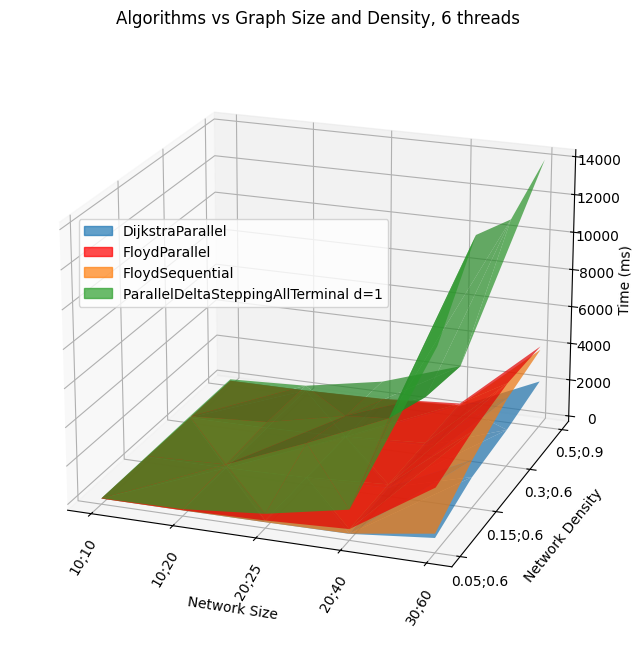

C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  V.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Z.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  WW.append(float(filtered_df["time"]))


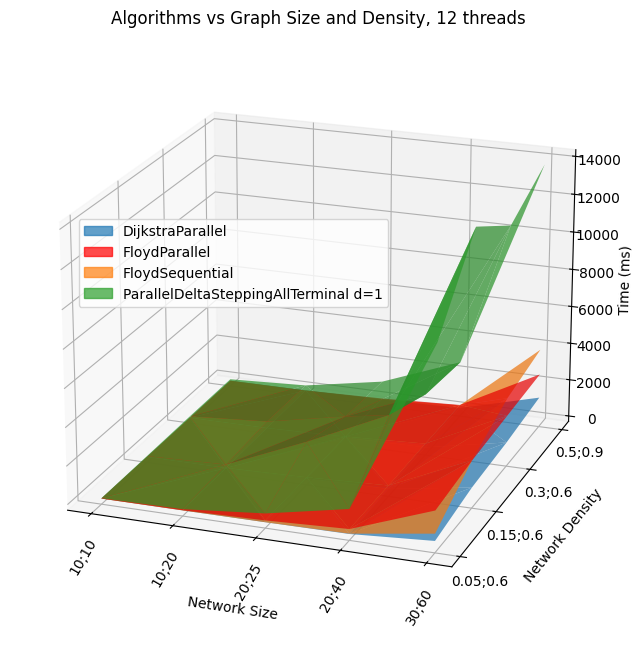

C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  V.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Z.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W.append(float(filtered_df["time"]))
C:\Users\oocta\AppData\Local\Temp\ipykernel_7116\1274225487.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  WW.append(float(filtered_df["time"]))


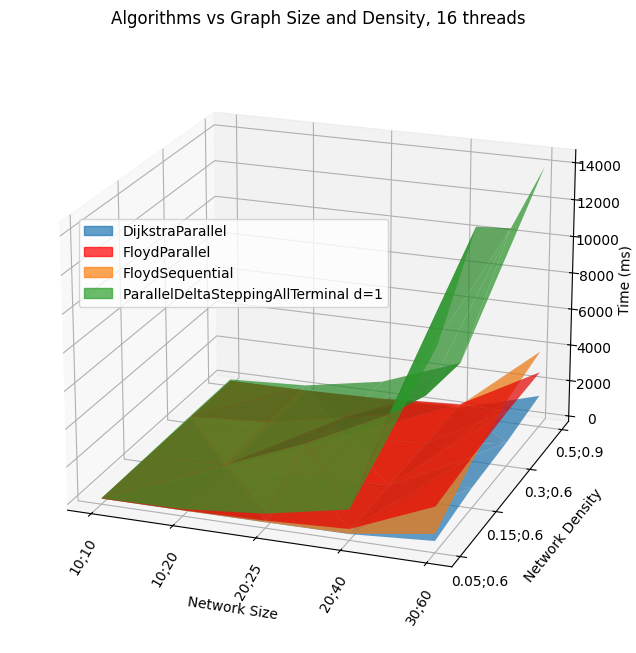

In [102]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


Xp = data['graph_size'].unique()
Yp = data['graph_density'].unique()
Xd = list(range(len(Xp)))
Yd = list(range(len(Yp)))
"""
['10;10' '10;20' '20;25' '20;40' '30;60']
['0.05;0.6' '0.15;0.6' '0.3;0.6']
"""

Z = []
W = []
V = []
WW = []
WWW = []
"""
graph_sizes = {{10, 10}, {10, 20}, {20, 25}, {20, 40}, {30, 60}};
["10;10", "10;20", "20;25", "20;40", "30;60"]

densities = {{0.3, 0.6}, {0.15, 0.6}, {0.05, 0.6}};
["0.3;0.6", "0.15;0.6", "0.05;0.6"]
"""
for n_t in [6, 12, 16]:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    Z = []
    W = []
    V = []
    WW = []
    WWW = []
    for x in Xp:
        for y in Yp:
            filtered_df = filter_df(data, alg=0, graph_size=x, graph_density=y)
            V.append(float(filtered_df["time"]))
            filtered_df = filter_df(data, alg=1, graph_size=x, graph_density=y, n_threads=n_t)
            Z.append(float(filtered_df["time"]))
            filtered_df = filter_df(data, alg=2, graph_size=x, graph_density=y, n_threads=n_t)
            W.append(float(filtered_df["time"]))
            filtered_df = filter_df(data, alg=3,delta=1, graph_size=x, graph_density=y, n_threads=n_t)
            WW.append(float(filtered_df["time"]))
            """filtered_df = filter_df(data, alg=3, delta=2, graph_size=x, graph_density=y, n_threads=n_t)
            WWW.append(float(filtered_df["time"]))"""

    zz = np.linspace(200, 10000, 100)

    Z = np.array(Z).reshape(len(Xp), len(Yp))
    W = np.array(W).reshape(len(Xp), len(Yp))
    V = np.array(V).reshape(len(Xp), len(Yp))
    WW = np.array(WW).reshape(len(Xp), len(Yp))
#    WWW = np.array(WWW).reshape(len(X), len(Y))

    X, Y = np.meshgrid(Xd, Yd)

    ax.view_init(elev=20, azim=290)  # change these values as needed
    ax.plot_trisurf(X.flatten(), Y.flatten(), V.T.flatten(), alpha=0.7, color='C1', label=Algorithm.fwd[0])
    ax.plot_trisurf(X.flatten(), Y.flatten(), Z.T.flatten(), alpha=0.7, color='r', label=Algorithm.fwd[1])
    ax.plot_trisurf(X.flatten(), Y.flatten(), W.T.flatten(), alpha=0.7, color='C0', label=Algorithm.fwd[2])
    ax.plot_trisurf(X.flatten(), Y.flatten(), WW.T.flatten(), alpha=0.7, color='C2', label=Algorithm.fwd[3] + " d=1")
#    ax.plot_trisurf(X.flatten(), Y.flatten(), WWW.T.flatten(), alpha=0.7, color='C3', label=Algorithm.fwd[3] + " d=2")

    plt.xticks(Xd, rotation=60)
    ax.set_xticklabels(Xp)
    plt.yticks(Yd)
    ax.set_yticklabels(Yp)
    ax.set_xlabel('Network Size', labelpad=15)
    ax.set_ylabel('Network Density', labelpad=10)
    ax.set_zlabel('Time (ms)', labelpad=5)

    orange_patch = mpatches.Patch(label=Algorithm.fwd[0], color="C1", alpha=0.7)
    red_patch = mpatches.Patch(label=Algorithm.fwd[1], color="r", alpha=0.7)
    blue_patch = mpatches.Patch(label=Algorithm.fwd[2], color="C0", alpha=0.7)
    WW_patch = mpatches.Patch(label=Algorithm.fwd[3] + " d=1", color="C2", alpha=0.7)
#    WWW_patch = mpatches.Patch(label=Algorithm.fwd[3] + " d=2", color="C3", alpha=0.7)

    # upper left shifted down
    plt.legend(handles=[blue_patch, red_patch, orange_patch, WW_patch], loc='upper left', bbox_to_anchor=(0.1, 0.7))
    #plt.legend(handles=[blue_patch, red_patch, orange_patch, WW_patch, WWW_patch], loc='upper left', bbox_to_anchor=(0.1, 0.7))

    plt.title('Algorithms vs Graph Size and Density, ' + str(n_t) + " threads", pad=-10)

    plt.show()


## Different Deltas

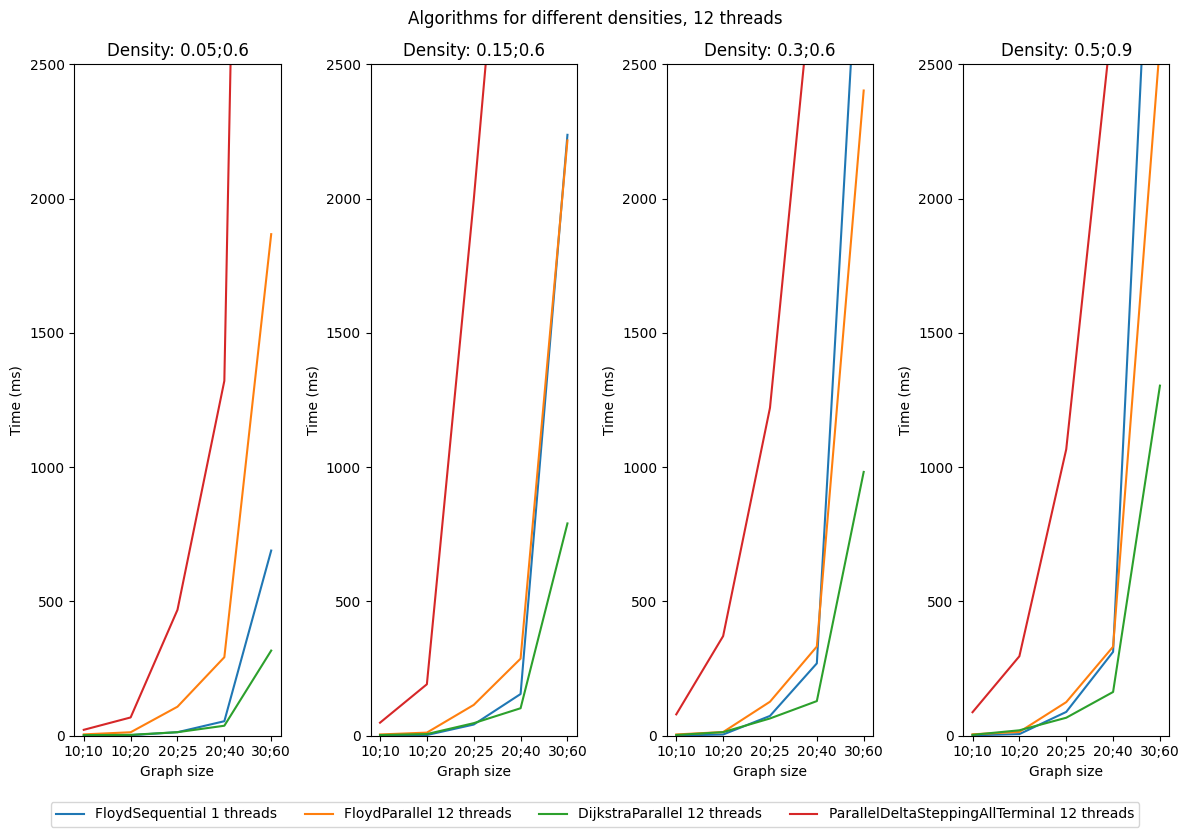

In [104]:
import matplotlib.pyplot as plt
import numpy as np

n_threads = 12
densities = data["graph_density"].unique()
fig, axs = plt.subplots(1,len(densities), figsize=(12, 8))

lines_labels = []

filtered_df = filter_df(data, n_threads=n_threads)
mmin = filtered_df["time"].min()
mmax = filtered_df["time"].max()

g_sizes = data['graph_size'].unique()

for i, density in enumerate(densities):
    filtered_df = filter_df(data, graph_density=density)

    for alg in [0, 1, 2, 3]:
        filtered_df_alg = filter_df(filtered_df, alg=alg, n_threads=n_threads if alg!=0 else 1)
        line, = axs[i].plot(list(range(len(filtered_df_alg["graph_size"]))), filtered_df_alg['time'], label=f"{Algorithm()[alg]} {n_threads if alg!=0 else 1} threads")

        if line.get_label() not in [label for _, label in lines_labels]:
            lines_labels.append((line, line.get_label()))

        """axs[i].annotate(Algorithm()[alg], 
                xy=(filtered_df_alg["delta"].iloc[-1], filtered_df_alg['time'].iloc[-1]), 
                xytext=(0,-5), textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=0.3,alpha=0.5))
"""
    if line.get_label() not in [label for _, label in lines_labels]:
        lines_labels.append((line, line.get_label()))

    #axs[i].set_yscale("log")
    axs[i].set_ylim(0, 2500)
    axs[i].set_title(f"Density: {density}")
    axs[i].set_xlabel('Graph size')
    axs[i].set_xticks(list(range(len(filtered_df_alg["graph_size"]))))
    axs[i].set_ylabel('Time (ms)')
    axs[i].set_xticklabels(Xp)

plt.suptitle(f"Algorithms for different densities, 12 threads")
plt.tight_layout()

lines, labels = zip(*lines_labels)
fig.legend(lines, labels, loc='lower center', ncol=len(lines), bbox_to_anchor=(0.5, -0.05))

plt.show()